# Are you a driver?....or a frequent rider?

**Do you break traffic rules pretty much everyday and don't care about it? Do you have a lot of speeding tickets piled up in your box?**

Do you feel like breaking every possible rule on the road and getting away????
Well,what we get at the end of this project might help you do that.........
But then again, _IT MIGHT NOT!!!!!_
...............................................
...............................................


This Jupyter Notebook presents an analysis on police activity on the roads of Florida city of USA.

Primarily, this project focuses on how police activity varies based on factors like gender and race of the driver or time of the day and year.

The dataset used is a stanardized stop data available __[here](https://openpolicing.stanford.edu/data/)__ for download.

_PS:The initial lines were just to grab your attention. This notebook in no way encourages breaking of Law. Please drive safe!!!_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
florida = pd.read_csv('FL_cleaned.csv')

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,16,21,22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data preparation

In [3]:
pd.options.display.max_columns = 30
florida.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
0,FL-2010-000001,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115.0,NaN,NaN,F,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citation,NaN,1743,NaN,NaN,NaN,CPL,False
1,FL-2010-000002,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115.0,NaN,NaN,NaN,NaN,NaN,W,White,SEATBELT (DRIVER),Seat belt,False,NO SEARCH REQUESTED,NaN,False,Citation,False,1743,M,NaN,NaN,NaN,NaN
2,FL-2010-000003,FL,2010-01-06,16:14,DUVAL,Duval County,12031.0,JACKSONVILLE,NaN,F,23.0,23.0,W,White,SPEED,Speeding,False,NO SEARCH REQUESTED,NaN,False,Citation,False,2138,M,31.0,Black,TROOPER,True
3,FL-2010-000004,FL,2010-01-08,19:39,DUVAL,Duval County,12031.0,JACKSONVILLE,NaN,F,45.0,45.0,W,White,CARELESS DRIVING|DUI,"DUI,Safe movement",False,NO SEARCH REQUESTED,NaN,False,Misdemeanor Arrest,True,2595,M,29.0,White,TPR,False
4,FL-2010-000005,FL,2010-01-11,11:56,ST. LUCIE,St. Lucie County,12111.0,NaN,NaN,M,41.0,41.0,W,White,DRIVING WHILE LICENSE SUSPENDED / REVOKED|SPEED,"License,Speeding",False,NO SEARCH REQUESTED,NaN,False,Misdemeanor Arrest,True,2586,M,26.0,White,TPR.,False


In [4]:
florida.shape

(5421446, 28)

The DataFrame 'florida' consists of 28 columns.
We, however, are not interested in all of them. Since we are trying to analyze based on attributes related to the driver (ex. grnder, race, violation etc.), it makes more sense to get rid of every other irrelevant columns.
We'll first get rid of the police officer related columns and location related columns

In [5]:
florida.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id', 'officer_gender', 'officer_age',
       'officer_race', 'officer_rank', 'out_of_state'],
      dtype='object')

In [6]:
unwanted = ['officer_id', 'officer_gender', 'officer_age', 'officer_race', 'officer_rank', 'out_of_state',
           'location_raw', 'county_name', 'county_fips', 'fine_grained_location', 'police_department', 'state']
florida.drop(unwanted, axis=1, inplace=True)
florida.head()

,id,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested
0,FL-2010-000001,2010-01-01,23:11,F,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Citation,NaN
1,FL-2010-000002,2010-01-01,23:11,NaN,NaN,NaN,W,White,SEATBELT (DRIVER),Seat belt,False,NO SEARCH REQUESTED,NaN,False,Citation,False
2,FL-2010-000003,2010-01-06,16:14,F,23.0,23.0,W,White,SPEED,Speeding,False,NO SEARCH REQUESTED,NaN,False,Citation,False
3,FL-2010-000004,2010-01-08,19:39,F,45.0,45.0,W,White,CARELESS DRIVING|DUI,"DUI,Safe movement",False,NO SEARCH REQUESTED,NaN,False,Misdemeanor Arrest,True
4,FL-2010-000005,2010-01-11,11:56,M,41.0,41.0,W,White,DRIVING WHILE LICENSE SUSPENDED / REVOKED|SPEED,"License,Speeding",False,NO SEARCH REQUESTED,NaN,False,Misdemeanor Arrest,True


In [7]:
florida.isnull().sum()

id                        0
stop_date                 0
stop_time               214
driver_gender       1316775
driver_age_raw      1319560
driver_age          1327591
driver_race_raw        1344
driver_race            1345
violation_raw        419696
violation            419686
search_conducted     419686
search_type_raw      423606
search_type         5392504
contraband_found     448628
stop_outcome          51626
is_arrested          419686
dtype: int64

In [8]:
florida.drop(['driver_age_raw', 'driver_race_raw', 'violation_raw', 'search_type_raw', 'search_type'], axis=1, inplace=True)
florida.head()

,id,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,contraband_found,stop_outcome,is_arrested
0,FL-2010-000001,2010-01-01,23:11,F,24.0,NaN,NaN,NaN,NaN,Citation,NaN
1,FL-2010-000002,2010-01-01,23:11,NaN,NaN,White,Seat belt,False,False,Citation,False
2,FL-2010-000003,2010-01-06,16:14,F,23.0,White,Speeding,False,False,Citation,False
3,FL-2010-000004,2010-01-08,19:39,F,45.0,White,"DUI,Safe movement",False,False,Misdemeanor Arrest,True
4,FL-2010-000005,2010-01-11,11:56,M,41.0,White,"License,Speeding",False,False,Misdemeanor Arrest,True


In [9]:
florida = florida.dropna()

In [10]:
florida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647426 entries, 2 to 4477929
Data columns (total 11 columns):
id                  object
stop_date           object
stop_time           object
driver_gender       object
driver_age          float64
driver_race         object
violation           object
search_conducted    object
contraband_found    object
stop_outcome        object
is_arrested         object
dtypes: float64(1), object(10)
memory usage: 333.9+ MB


In [11]:
from datetime import datetime
florida['stop_date'] = pd.to_datetime(florida['stop_date'], format = '%Y-%m-%d')

In [12]:
florida['stop_time'] = pd.to_datetime(florida['stop_time'], format = '%H:%M')

In [13]:
florida['violation'].unique()

array(['Speeding', 'DUI,Safe movement', 'License,Speeding',
       'Equipment,Speeding', 'Equipment,Truck', 'DUI',
       'Registration/plates,Speeding', 'Equipment,Registration/plates',
       'Safe movement', 'Registration/plates,Safe movement',
       'Paperwork,Speeding,Truck', 'Seat belt', 'Paperwork,Speeding',
       'Equipment,License,Speeding', 'Paperwork', 'Paperwork,Truck',
       'Equipment,Paperwork,Speeding', 'Equipment',
       'License,Safe movement', 'Paperwork,Registration/plates,Speeding',
       'Lights,Seat belt', 'Registration/plates,Seat belt,Speeding',
       'License,Lights,Paperwork', 'Lights,Registration/plates',
       'Equipment,License,Lights', 'Lights,Paperwork,Truck',
       'License,Other,Seat belt', 'Seat belt,Speeding', 'Other,Speeding',
       'Truck', 'Equipment,Safe movement', 'License,Paperwork,Speeding',
       'Other', 'Lights', 'Equipment,Seat belt',
       'License,Seat belt,Truck', 'Safe movement,Seat belt',
       'Equipment,License', 'Equipm

The violation column is messed up because there have been several violations recorded for single events.
We'll create 5-6 new columns for the 5-6 most common violations which will have a True or False value for wheather that violation was committed or not
1. License
2. Seat belt
3. DUI
4. Registration/plates
5. Paperwork
6. Speeding
7. Equipment

In [14]:
def license(s):
    if 'License' in s:
        a=True
    else:
        a=False
    return a

def seat_belt(s):
    if 'Seat belt' in s:
        a=True
    else:
        a=False
    return a

def DUI(s):
    if 'DUI' in s:
        a=True
    else:
        a=False
    return a

def reg(s):
    if 'Registration/plates' in s:
        a=True
    else:
        a=False
    return a

def paperwork(s):
    if 'Paperwork' in s:
        a=True
    else:
        a=False
    return a

def speed(s):
    if 'Speeding' in s:
        a=True
    else:
        a=False
    return a

def equipment(s):
    if 'Equipment' in s:
        a=True
    else:
        a=False
    return a

florida['license'] = florida['violation'].apply(license)
florida['seat_belt'] = florida['violation'].apply(seat_belt)
florida['DUI'] = florida['violation'].apply(DUI)
florida['reg'] = florida['violation'].apply(reg)
florida['paperwork'] = florida['violation'].apply(paperwork)
florida['speeding'] = florida['violation'].apply(speed)
florida['equipment'] = florida['violation'].apply(equipment)

In [15]:
florida.head()

,id,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,contraband_found,stop_outcome,is_arrested,license,seat_belt,DUI,reg,paperwork,speeding,equipment
2,FL-2010-000003,2010-01-06,1900-01-01 16:14:00,F,23.0,White,Speeding,False,False,Citation,False,False,False,False,False,False,True,False
3,FL-2010-000004,2010-01-08,1900-01-01 19:39:00,F,45.0,White,"DUI,Safe movement",False,False,Misdemeanor Arrest,True,False,False,True,False,False,False,False
4,FL-2010-000005,2010-01-11,1900-01-01 11:56:00,M,41.0,White,"License,Speeding",False,False,Misdemeanor Arrest,True,True,False,False,False,False,True,False
8,FL-2010-000009,2010-01-15,1900-01-01 09:18:00,M,26.0,White,"Equipment,Speeding",False,False,Warning,False,False,False,False,False,False,True,True
13,FL-2010-000014,2010-01-15,1900-01-01 13:55:00,M,32.0,Black,"Equipment,Truck",False,False,Citation,False,False,False,False,False,False,False,True


## Notorious gender

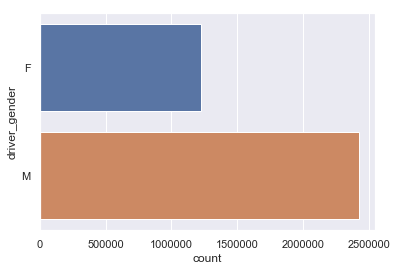

In [16]:
sns.set(style='darkgrid')
sns.countplot(y='driver_gender', data=florida)

In [17]:
florida.iloc[:,11:].sum()

license       327833
seat_belt     395357
DUI            17058
reg           354699
paperwork     467172
speeding     2151982
equipment     486013
dtype: int64

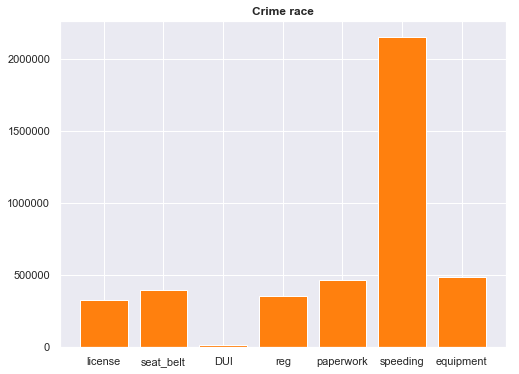

In [18]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot()
r = np.arange(1,8)
plt.bar(r,florida.iloc[:,11:].sum(), color=(255/255, 128/255, 14/255), width=0.8)
plt.title('Crime race', fontweight='bold')
plt.xticks(r, florida.columns[11:])
plt.show()

In [19]:
violation_by_gender = florida.groupby(['driver_gender']).sum()
violation_by_gender.drop('driver_age', axis=1, inplace=True)

In [20]:
violation_by_gender = violation_by_gender.reset_index()
violation_by_gender

,driver_gender,license,seat_belt,DUI,reg,paperwork,speeding,equipment
0,F,113698.0,103800.0,3677.0,123118.0,176610.0,801443.0,149641.0
1,M,214135.0,291557.0,13381.0,231581.0,290562.0,1350539.0,336372.0


In [21]:
violation_by_gender.columns[1:]

Index(['license', 'seat_belt', 'DUI', 'reg', 'paperwork', 'speeding',
       'equipment'],
      dtype='object')

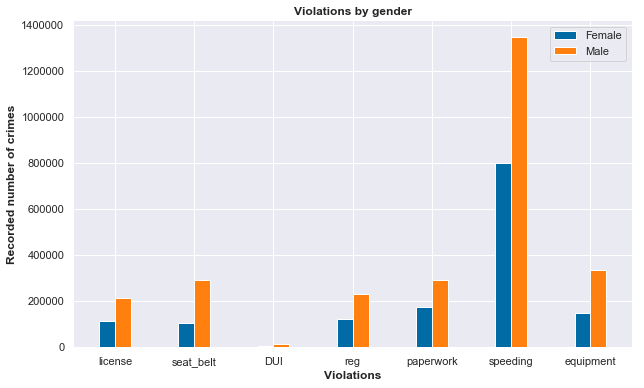

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,6))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

r1=np.arange(1,8)
ax.bar(r1-0.1, violation_by_gender.iloc[0,1:], width=0.2, label='Female', color=cb_dark_blue)
ax.bar(r1+0.1, violation_by_gender.iloc[1,1:], width=0.2, label='Male', color=cb_orange)
plt.xticks(r1,violation_by_gender.columns[1:])
plt.title('Violations by gender', fontweight='bold')
ax.set_xlabel('Violations', fontweight='bold')
ax.set_ylabel('Recorded number of crimes', fontweight='bold')
direc = ['right', 'left', 'top', 'bottom']
for d in direc:
    ax.spines[d].set_visible(False)

plt.legend()
plt.show()

For all of the seven common categories of violations, we can clearly see that men out does women.
However, one interesting observarion from our analysis so far is that for both men and women, the number of 'speeding' category violation is way higher than the rest.
In the next few steps we have tried to explore the outcome results from a speeding violation and how might the outcome change depending on gender

In [31]:
#checking speeding outcomes by gender
speeding = florida[florida['speeding']==True]
speeding[speeding['driver_gender']=='M']['stop_outcome'].value_counts().sort_index()/len(speeding[speeding['driver_gender']=='M'])

Citation                   0.782875
Faulty Equipment Notice    0.000015
Felony Arrest              0.001322
Misdemeanor Arrest         0.021026
Warning                    0.194763
Name: stop_outcome, dtype: float64

In [30]:
speeding[speeding['driver_gender']=='F']['stop_outcome'].value_counts().sort_index()/len(speeding[speeding['driver_gender']=='F'])

Citation                   0.777849
Faulty Equipment Notice    0.000019
Felony Arrest              0.000504
Misdemeanor Arrest         0.012050
Warning                    0.209578
Name: stop_outcome, dtype: float64

In [44]:
male_arrest = speeding[speeding['driver_gender']=='M']['is_arrested'].sum()/len(speeding[speeding['driver_gender']=='M'])
female_arrest = speeding[speeding['driver_gender']=='F']['is_arrested'].sum()/len(speeding[speeding['driver_gender']=='F'])

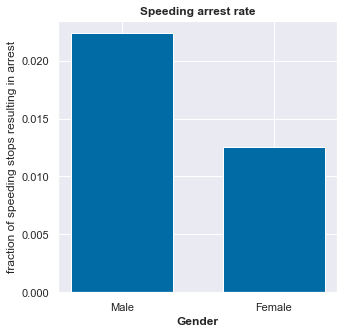

In [99]:
#rate of arrest by gender for speeding
fig, ax = plt.subplots(figsize=(5,5))

ax.bar([1,1.6], [male_arrest, female_arrest], width=0.4, color=cb_dark_blue)
ax.set_xlabel('Gender', fontweight='bold')
ax.set_ylabel('fraction of speeding stops resulting in arrest')
plt.title('Speeding arrest rate', fontweight='bold')
plt.xticks([1,1.6], ['Male', 'Female'])
plt.show()

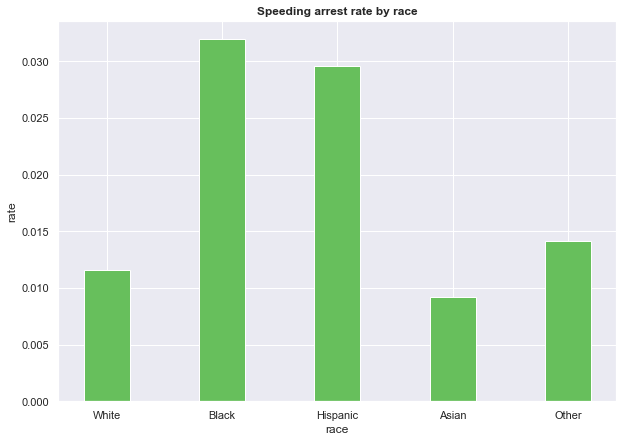

In [101]:
#arrest rate by race for speeding
race_arrest = []
for f in speeding['driver_race'].unique():
    race_arrest.append(speeding[speeding['driver_race']==f]['is_arrested'].sum()/len(speeding[speeding['driver_race']==f]))
    
cb_green = (103/255, 191/255, 92/255)

fig, ax=plt.subplots(figsize=(10,7))
ax.bar(np.arange(1,6), race_arrest, width=0.4, color=cb_green)
plt.title('Speeding arrest rate by race', fontweight='bold')
ax.set_xlabel('race')
ax.set_ylabel('rate')
plt.xticks(np.arange(1,6), speeding['driver_race'].unique())
plt.show()

In [48]:
florida.head()

,id,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,contraband_found,stop_outcome,is_arrested,license,seat_belt,DUI,reg,paperwork,speeding,equipment
2,FL-2010-000003,2010-01-06,1900-01-01 16:14:00,F,23.0,White,Speeding,False,False,Citation,False,False,False,False,False,False,True,False
3,FL-2010-000004,2010-01-08,1900-01-01 19:39:00,F,45.0,White,"DUI,Safe movement",False,False,Misdemeanor Arrest,True,False,False,True,False,False,False,False
4,FL-2010-000005,2010-01-11,1900-01-01 11:56:00,M,41.0,White,"License,Speeding",False,False,Misdemeanor Arrest,True,True,False,False,False,False,True,False
8,FL-2010-000009,2010-01-15,1900-01-01 09:18:00,M,26.0,White,"Equipment,Speeding",False,False,Warning,False,False,False,False,False,False,True,True
13,FL-2010-000014,2010-01-15,1900-01-01 13:55:00,M,32.0,Black,"Equipment,Truck",False,False,Citation,False,False,False,False,False,False,False,True


In [65]:
florida['stop_hour'] = florida['stop_time'].dt.hour
florida['arrested'] = florida['is_arrested']
hourly_arrest_rate = florida.groupby(['stop_hour'])

In [78]:
x = florida['stop_hour'].value_counts().sort_index()
hourly_arrest = hourly_arrest_rate['arrested'].sum()/x

In [82]:
hourly_arrest.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='stop_hour')

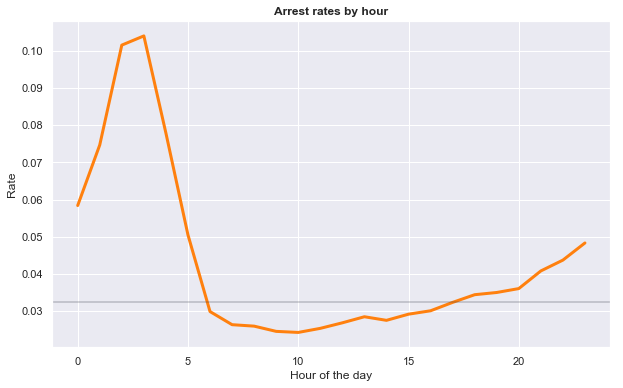

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hourly_arrest.index, hourly_arrest, linewidth=3, color=cb_orange)
ax.axhline(florida['arrested'].sum()/len(florida), c=(65/255, 68/255, 81/255), alpha=0.3)
ax.set_xlabel('Hour of the day')
plt.title('Arrest rates by hour', fontweight='bold')
ax.set_ylabel('Rate')
plt.show()

Analyzing the effect of weather on policing

In [106]:
#reading the weather data
weather = pd.read_csv('weather.csv')

In [107]:
weather

,STATION,NAME,DATE,AWND,PRCP,TAVG,WESD,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT16,WT18,WT21
0,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-06,7.83,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-07,2.46,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-08,6.04,0.00,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
3,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-09,9.84,0.03,NaN,0.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
4,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-10,9.17,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-11,6.71,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-12,7.61,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-13,4.25,0.00,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-14,3.36,0.00,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,USW00012834,"DAYTONA BEACH INTERNATIONAL AIRPORT, FL US",2010-01-15,3.58,0.00,NaN,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


In [109]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 22 columns):
STATION    2002 non-null object
NAME       2002 non-null object
DATE       2002 non-null object
AWND       2002 non-null float64
PRCP       2002 non-null float64
TAVG       821 non-null float64
WESD       360 non-null float64
WT01       936 non-null float64
WT02       79 non-null float64
WT03       317 non-null float64
WT04       2 non-null float64
WT05       79 non-null float64
WT07       13 non-null float64
WT08       184 non-null float64
WT09       6 non-null float64
WT10       2 non-null float64
WT11       2 non-null float64
WT13       534 non-null float64
WT14       21 non-null float64
WT16       469 non-null float64
WT18       1 non-null float64
WT21       19 non-null float64
dtypes: float64(19), object(3)
memory usage: 344.2+ KB


In [110]:
weather.describe()

,AWND,PRCP,TAVG,WESD,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT16,WT18,WT21
count,2002.000000,2002.000000,821.000000,360.0,936.0,79.0,317.0,2.0,79.0,13.0,184.0,6.0,2.0,2.0,534.0,21.0,469.0,1.0,19.0
mean,6.148247,0.129426,71.585871,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.844182,0.413569,9.087864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
min,0.670000,0.000000,39.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.030000,0.000000,66.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,5.590000,0.000000,74.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,7.610000,0.030000,79.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,23.040000,6.410000,85.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [113]:
weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y-%m-%d')

In [129]:
weather = weather[['DATE','AWND','PRCP','TAVG','WESD']]

In [118]:
florida['is_arrested'] = florida['arrested'].astype(bool)

In [119]:
#grouping the policing data by date
by_day = florida.groupby('stop_date')

In [131]:
sum_by_day = by_day.sum().reset_index()
count_by_day = by_day.count().reset_index()
sum_frame = pd.merge(left=sum_by_day, right=weather, left_on='stop_date', right_on='DATE', how='left')
count_frame = pd.merge(left=count_by_day, right=weather, left_on='stop_date', right_on='DATE', how='left')

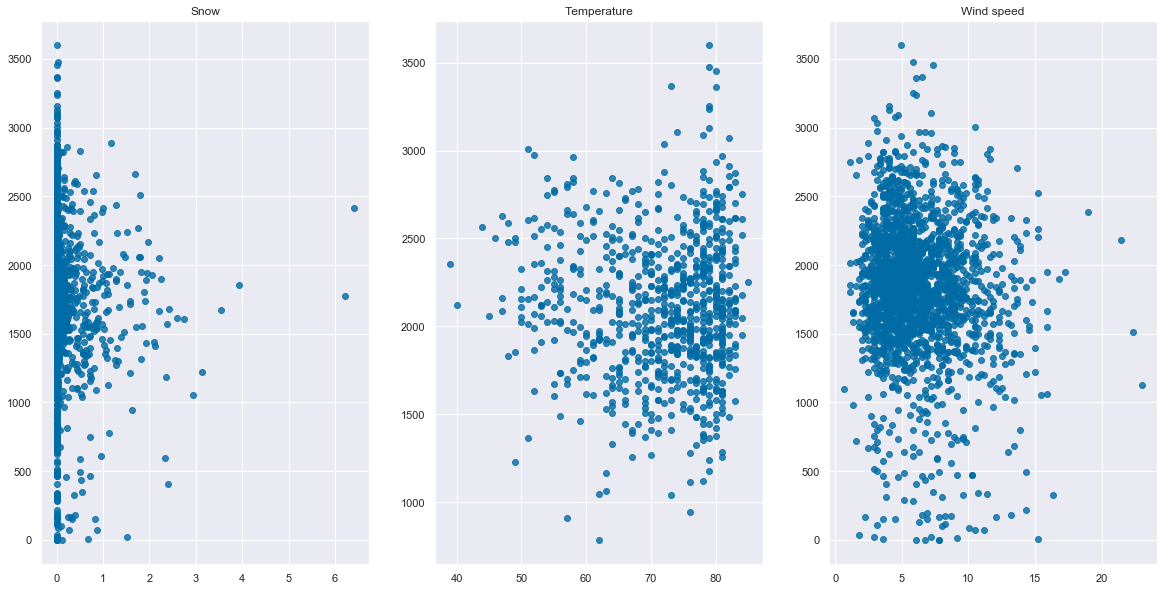

In [159]:
#Plotting police activity by weather conditions

fig = plt.figure(figsize=(20,10), facecolor='w')
direc = ['right', 'left', 'top', 'bottom']

ax = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)
ax.scatter(count_frame['PRCP'], count_frame['id'], color=cb_dark_blue, alpha=0.8)
ax1.scatter(count_frame['TAVG'], count_frame['id'], color=cb_dark_blue, alpha=0.8)
ax2.scatter(count_frame['AWND'], count_frame['id'], color=cb_dark_blue, alpha=0.8)

ax.set_title('Snow')
ax1.set_title('Temperature')
ax2.set_title('Wind speed')

plt.show()

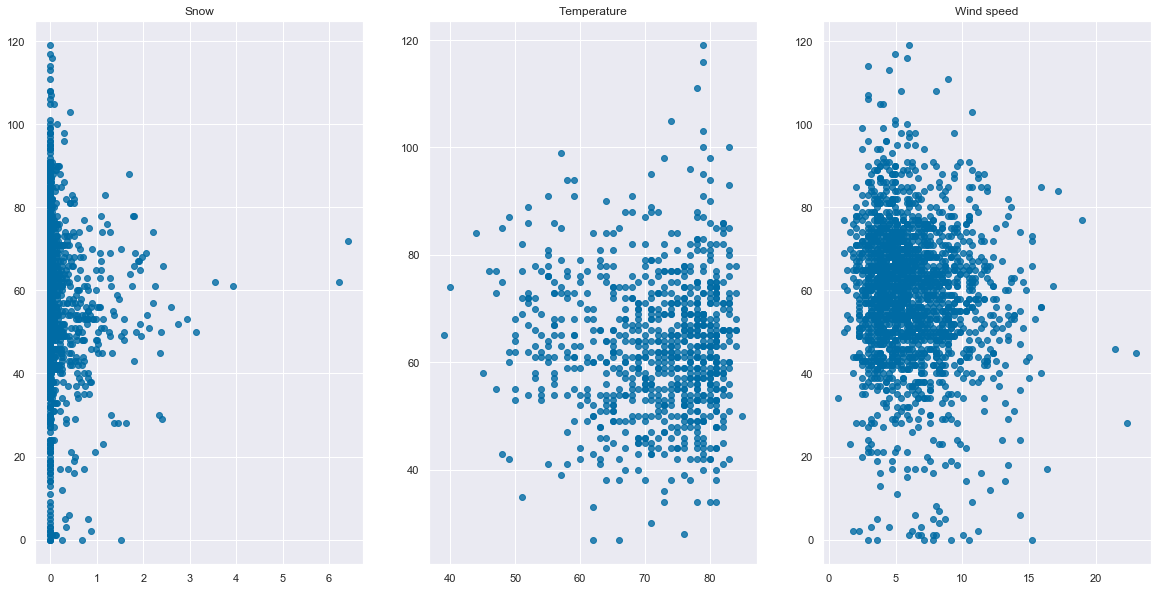

In [163]:
#plotting arrest rate by weather

fig = plt.figure(figsize=(20,10), facecolor='w')

ax = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)
ax.scatter(sum_frame['PRCP'], sum_frame['is_arrested'], color=cb_dark_blue, alpha=0.8)
ax1.scatter(sum_frame['TAVG'], sum_frame['is_arrested'], color=cb_dark_blue, alpha=0.8)
ax2.scatter(sum_frame['AWND'], sum_frame['is_arrested'], color=cb_dark_blue, alpha=0.8)

ax.set_title('Snow')
ax1.set_title('Temperature')
ax2.set_title('Wind speed')

plt.show()